# **c. Implement the data mining algorithm of choice**

Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [3]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [12]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [13]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

In [14]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [16]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [17]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [18]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [19]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [21]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [22]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

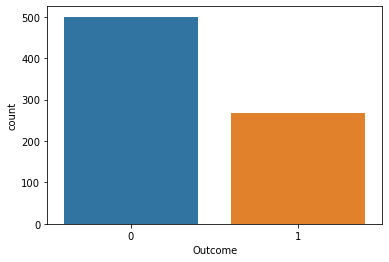

In [8]:
sns.countplot(x=df.Outcome)


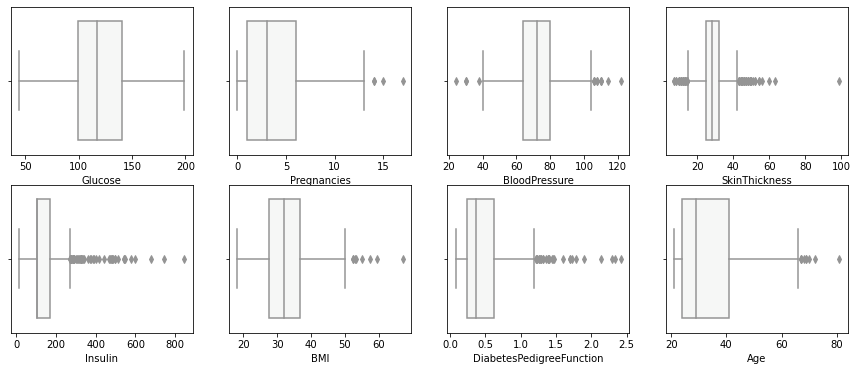

In [25]:
f, axes = plt.subplots(2, 4, figsize=(15, 6))

sns.boxplot(x= "Glucose", data=df, palette="PRGn", ax=axes[0,0])
sns.boxplot(x="Pregnancies", data=df, palette="PRGn", ax=axes[0,1])
sns.boxplot(x="BloodPressure", data=df, palette="PRGn", ax=axes[0,2])
sns.boxplot(x="SkinThickness", data=df, palette="PRGn", ax=axes[0,3])

sns.boxplot(x= "Insulin", data=df, palette="PRGn", ax=axes[1,0])
sns.boxplot(x="BMI", data=df, palette="PRGn", ax=axes[1,1])
sns.boxplot(x="DiabetesPedigreeFunction", data=df, palette="PRGn", ax=axes[1,2])
sns.boxplot(x="Age", data=df, palette="PRGn", ax=axes[1,3])

plt.show()

Boxplot clearly shows that features like "Insulin", "DiabetesPedigreeFunction", "BMI" and "BloodPressure" have a lot of Outliers but we are not going to remove them because all patients data are required for the model training and prediction.

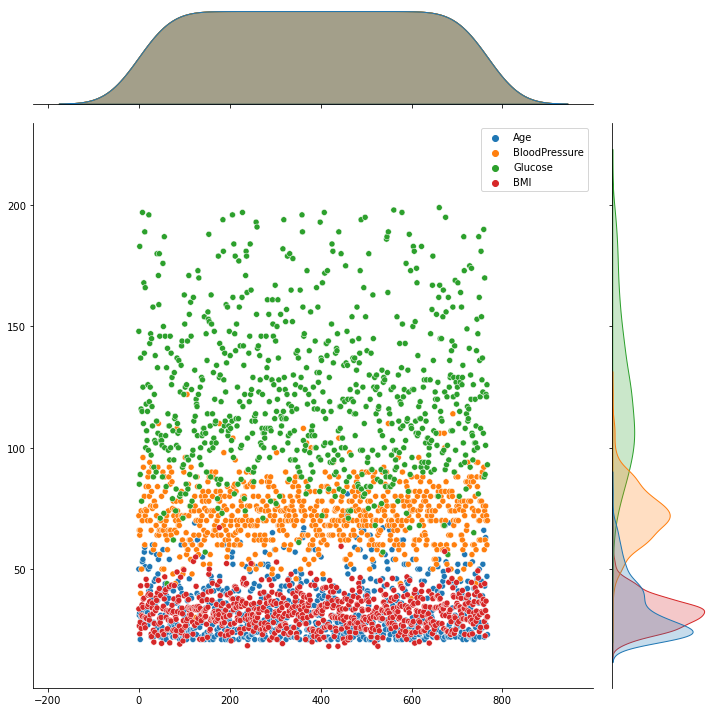

In [26]:
sns.jointplot(data=df[['Age','BloodPressure', 'Glucose','BMI']],height=10, ratio=5, color="r")

Here, we can say that "Glucose" has a high variance than other features, whereas BMI shows high bias as its data points are more clustered.

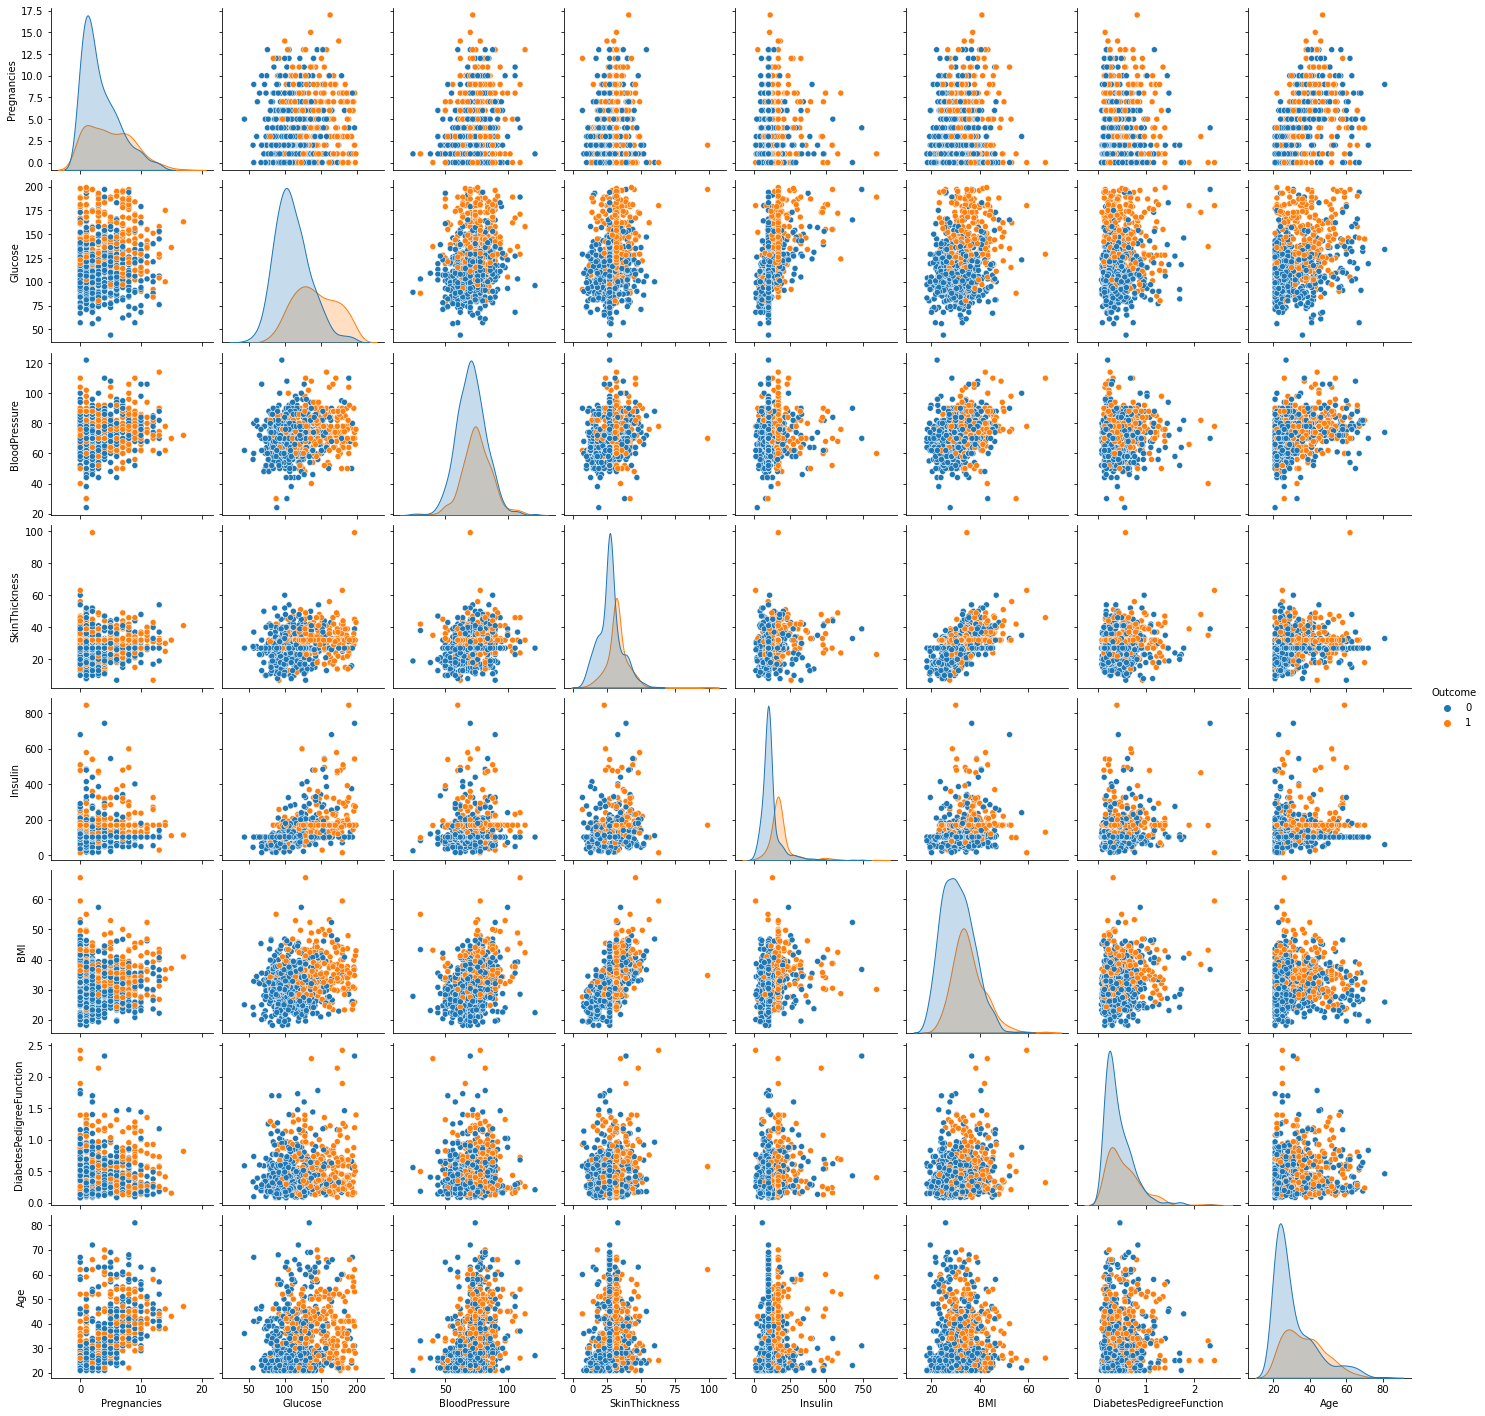

In [28]:
sns.pairplot(df, hue='Outcome')
plt.show()

A pairwise plot has been used to create pairwise relationships in a dataset. It creates scatter plots for joint relationships and histograms for univariate distributions. The dataset comprised all female patients who are diabetic for 21 years and binary target variables, Outcome takes values 0 or 1 where 0 indicates negative for diabetes and 1 indicates positive for diabetes.

In [29]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


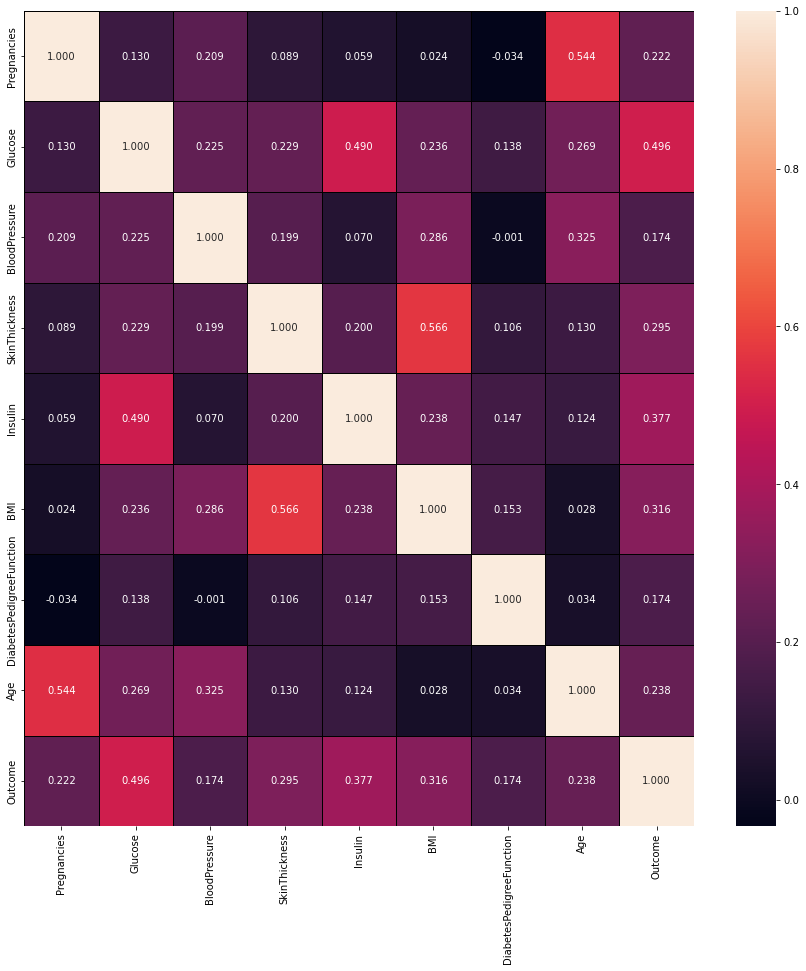

In [30]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.3f', ax=ax)
plt.show()

Treating Outliers and Non-Normality
Outliers are extreme values existing in the dataset. It is necessary to treat outliers if a distance-based algorithm (logistic regression, SVM, etc) is applied on the dataset. Outliers do not affect a tree-based algorithm. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution with mean 0.

In [31]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']
columns = x.columns

Splitting the dataset into Training and Test data
We now split our processed dataset into Training and Test data. The Test data size is take to be 15% of the entire data (which means 115 observations) and the model will be trained on 653 observations.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [34]:
data_x = pd.DataFrame(X, columns = columns)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, y, test_size = 0.15, random_state = 45)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

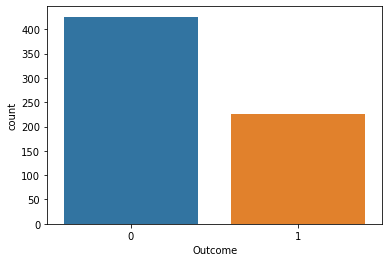

In [36]:
sns.countplot(x=y_train)

A huge imbalance can be observed in the y_train values. To overcome this problem, we use the SMOTE technique.
Synthetic Minority Oversampling Technique (SMOTE) is used to remove the imbalance in the training data by creating samples using the current data. It does not create duplicates. Remember it is always done on the Training Date and not on the original data as the Test Data should only contain real-life values and not the synthetic sample.

In [37]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
np.bincount(y_train)


array([426, 426], dtype=int64)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

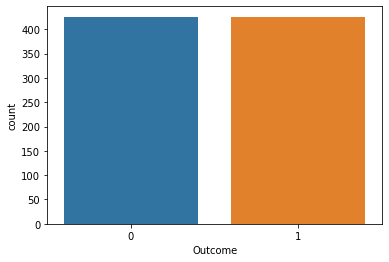

In [38]:
sns.countplot(x=y_train)

In [39]:
from sklearn import metrics

def performance(y_pred):   
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, cmap="YlGnBu" , fmt='g', annot=True)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))
    print("Recall:",metrics.recall_score(y_test, y_pred, average="macro"))
    print("F measure:",metrics.f1_score(y_test, y_pred, average="macro"))

In [83]:
from sklearn import metrics

def roc(model, y_score):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=[7,7])
    metrics.plot_roc_curve(model, x_test, y_test)
    # Add dashed line with a slope of 1
    plt.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve ({:.2f})".format(roc_auc));

Logistic Regression

Accuracy: 0.7758620689655172
Precision: 0.7583850931677019
Recall: 0.7676962676962678
F measure: 0.7619949494949495


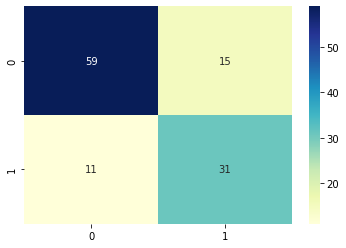

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
performance(logreg_pred)


<Figure size 504x504 with 0 Axes>

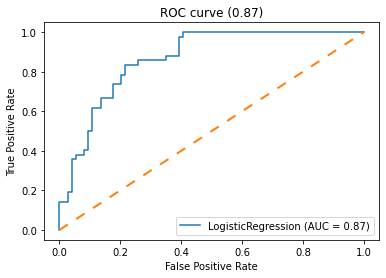

In [88]:
roc(logreg, logreg.predict_proba(x_test)[::, 1])

Naive Bayes

Accuracy: 0.7413793103448276
Precision: 0.720959595959596
Recall: 0.7252252252252251
F measure: 0.7228416693214399


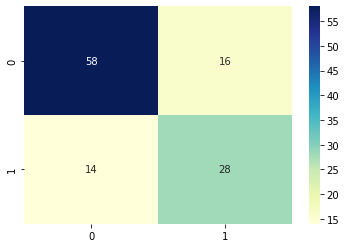

In [89]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)
naive_pred=naive.predict(x_test)
performance(naive_pred)

<Figure size 504x504 with 0 Axes>

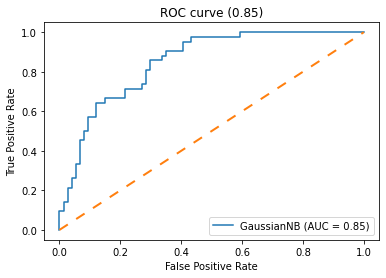

In [90]:
roc(naive, naive.predict_proba(x_test)[::, 1])

Support Vector Machine

Accuracy: 0.8448275862068966
Precision: 0.832121212121212
Recall: 0.8526383526383526
F measure: 0.837888198757764


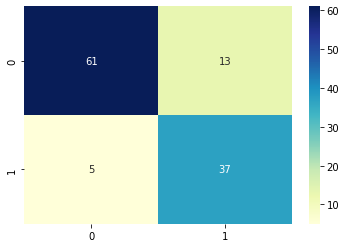

In [91]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf',probability=True)
classifier_rbf.fit(x_train, y_train)
svm_pred = classifier_rbf.predict(x_test)
performance(svm_pred)

<Figure size 504x504 with 0 Axes>

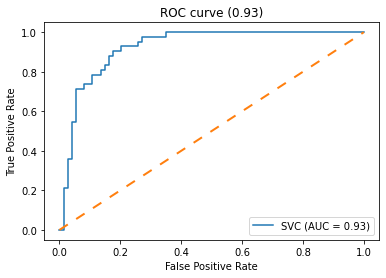

In [92]:
roc(classifier_rbf, classifier_rbf.predict_proba(x_test)[::, 1])

Random Forest Classifier

Accuracy: 0.9224137931034483
Precision: 0.9144632048423065
Recall: 0.9185971685971686
F measure: 0.9164465786314526


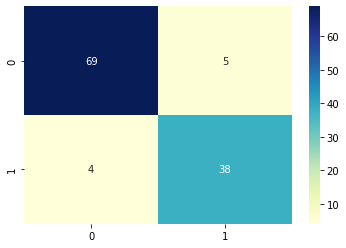

In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
rf_pred = model.predict(x_test)
performance(rf_pred)

<Figure size 504x504 with 0 Axes>

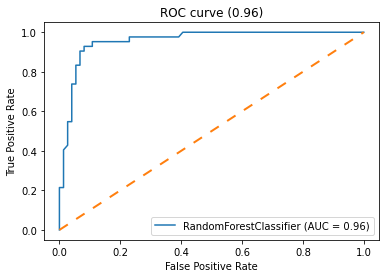

In [102]:
roc(model, model.predict_proba(x_test)[::, 1])

Decision Tree Classifier

Accuracy: 0.8620689655172413
Precision: 0.8507078507078507
Recall: 0.8507078507078507
F measure: 0.8507078507078507


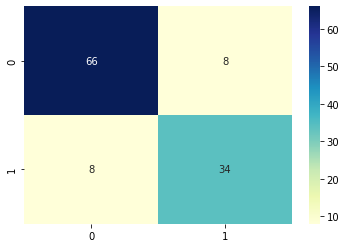

In [105]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
d_tree_pred=d_tree.predict(x_test)

performance(d_tree_pred)

<Figure size 504x504 with 0 Axes>

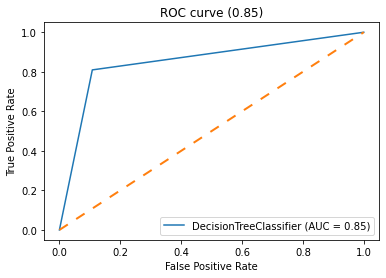

In [111]:
roc( d_tree, d_tree.predict_proba(x_test)[::, 1])

K-Nearest Neighbors

Accuracy: 0.8362068965517241
Precision: 0.8225708193725252
Recall: 0.8407335907335907
F measure: 0.8282285090795729


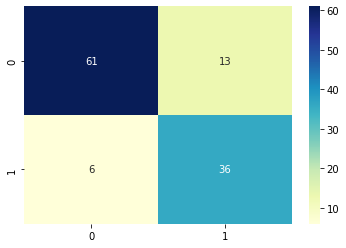

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
performance(knn_pred)

<Figure size 504x504 with 0 Axes>

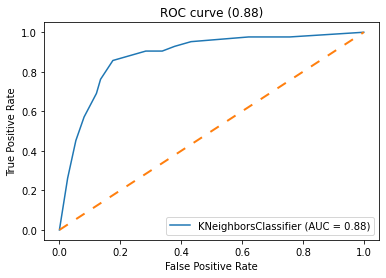

In [108]:
roc(knn, knn.predict_proba(x_test)[::, 1])